<a href="https://colab.research.google.com/github/EON-LEE/Course-DeepLearning/blob/main/week9_week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 강의 9주차

## 환경 설정

In [ ]:
import tensorflow as tf
import subprocess
import sys

# 현재 텐서플로우 버전 확인
current_version = tf.__version__
desired_version = "2.18.0"  # 원하는 버전 지정

print(f"현재 TensorFlow 버전: {current_version}")
print(f"원하는 TensorFlow 버전: {desired_version}")

# 버전 비교 및 설치
if current_version != desired_version:
    print(f"TensorFlow {desired_version}으로 설치를 시작합니다...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", f"tensorflow=={desired_version}"])
    print(f"TensorFlow {desired_version} 설치 완료. 코드를 다시 실행하세요.")
else:
    print("이미 원하는 버전이 설치되어 있습니다.")

## Simple Linear Regression with Neural Networks

### 데이터셋 만들기

In [1]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


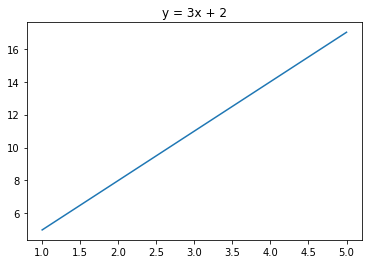

In [2]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

### 모델구조

In [3]:
import tensorflow as tf

In [4]:
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [5]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정 
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

### 선형회귀모형 생성

In [8]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

In [9]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


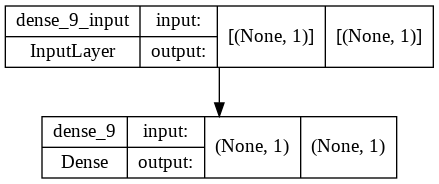

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [12]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])



In [13]:

# 훈련
history = model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 134.5472 - mae: 10.8273
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 78.4980 - mae: 8.3088
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 45.8346 - mae: 6.3860
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 26.7994 - mae: 4.9181
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 15.7061 - mae: 3.7973
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2408 - mae: 2.9416
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 5.4726 - mae: 2.2882
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 3.2760 - mae: 1.7893
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 1.9954 - mae: 1.4083
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 1.2486 - mae: 1.1173
Epoch 11/100
1/1 [==============================] - 0s 19ms/step

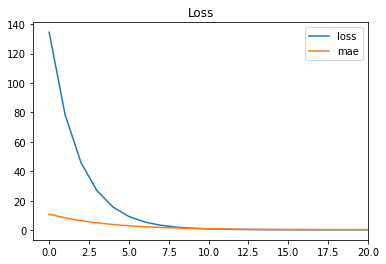

In [14]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [15]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 477ms/step - loss: 0.1120 - mae: 0.2872


[0.11198824644088745, 0.28723448514938354]

In [16]:
# 수정

# 예측
# Convert the list to a NumPy array before passing it to predict()
model.predict(np.array([[10]]))  
# 3 * 10 + 2 = 32

array([[33.388237]], dtype=float32)

## mnist classification with Neural Networks

### 데이터셋 만들기

In [17]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [18]:
# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [19]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


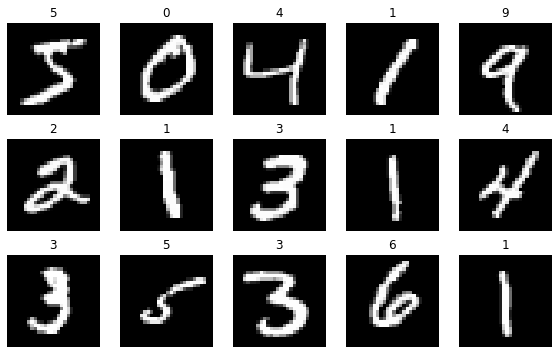

In [20]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 데이터 전처리

In [21]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [22]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [23]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [24]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

### Input 의 2가지 방법

In [25]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [26]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 모델 설계

#### 출력 층이 1개 node 인 경우

In [27]:
# # 출력층 노드 = 1인 경우, sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(1, activation='sigmoid'), 
])

In [28]:

# tf.keras.layers.Dense(1, activation='sigmoid')

# # 출력층 노드 = 2개 이상인 경우, softmax
# tf.keras.layers.Dense(10, activation='softmax')

In [29]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

#### 출력 층이 10개 node인 경우

In [30]:
# # 출력층 노드 = 1인 경우, sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

In [31]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# # y가 원 핫 벡터가 아닌경우
# # [5]
# model.compile(loss='sparse_categorical_crossentropy')

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dense_15 (Dense)            (None, 64)                16448     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


#### 옵티마이져

In [ ]:
# 수정

# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
# model.compile(optimizer='adam')

: 

#### 평가 지표

In [34]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

### 훈련

In [35]:
# 훈련
model.fit(x_train, y_train, 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2277 - sparse_categorical_accuracy: 0.9323
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0943 - sparse_categorical_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0665 - sparse_categorical_accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0504 - sparse_categorical_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0393 - sparse_categorical_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0329 - sparse_categorical_accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0275 - sparse_categorical_accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0255 - sparse_categorical_accuracy: 0.9917
Epoch 9/10
1875/1875 [====

### 테스트

In [36]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0868 - sparse_categorical_accuracy: 0.9789
검증셋 정확도: 0.9789000153541565


### 예측

In [37]:
# 예측
predictions = model.predict(x_test)

In [38]:
# 예측 결과 출력
predictions[0]

array([1.14611876e-08, 9.49558920e-09, 3.54599308e-07, 3.09359734e-06,
       4.19941095e-08, 1.42357194e-07, 1.26290969e-14, 9.99981284e-01,
       3.20161031e-09, 1.51657714e-05], dtype=float32)

In [39]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

7


In [40]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


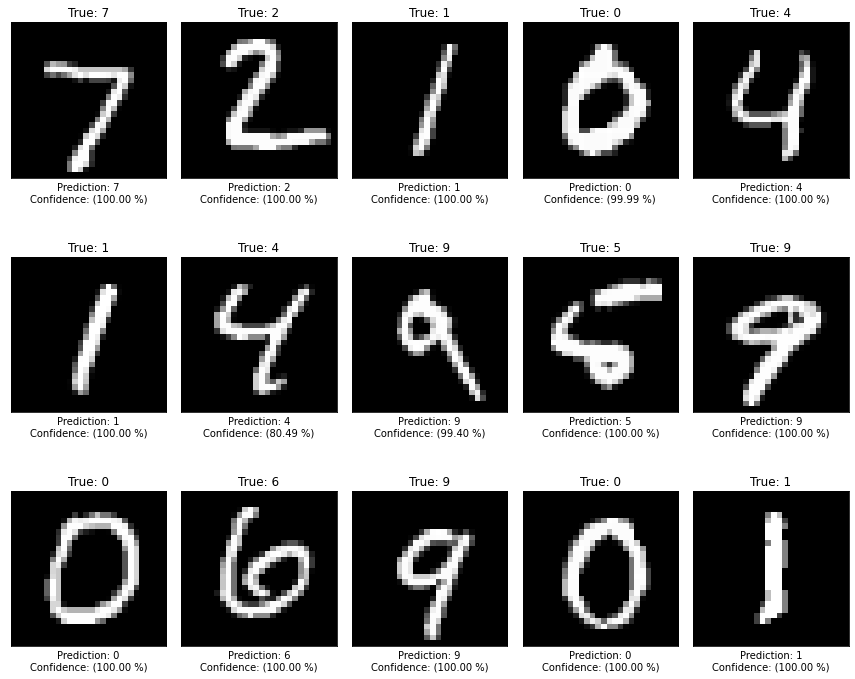

In [41]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

# 딥러닝 강의 10주차

In [42]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


## Deep Learning Optimization Techniques

#### weight initialization

In [43]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [44]:

# he normal 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

#### Weight Penalty

In [45]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_20',
 'trainable': True,
 'units': 256,
 'use_bias': True}

In [46]:
# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


In [47]:
# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l2(l2=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L2', 'config': {'l2': 0.10000000149011612}}


In [48]:
tf.keras.regularizers.L1(0.3)  # L1 Regularization Penalty
tf.keras.regularizers.L2(0.1)  # L2 Regularization Penalty
tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)  # L1 + L2 penalties

##### 비교

In [49]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [50]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)


17473536/17464789 [==============================] - 0s 0us/step


In [51]:
train_data.shape

(25000,)

In [52]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [53]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [54]:
train_data.shape

(25000, 1000)

In [55]:
train_data[0]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

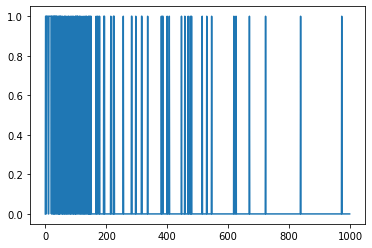

In [56]:
plt.plot(train_data[0])

In [57]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                16016     
                                                                 
 dense_24 (Dense)            (None, 16)                272       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# shape check
train_labels.reshape(-1, 1).shape, train_labels.shape

In [58]:
# 수정

baseline_history = baseline_model.fit(train_data,
                                      train_labels.reshape(-1, 1),
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels.reshape(-1, 1)),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5817 - accuracy: 0.7028 - binary_crossentropy: 0.5817 - val_loss: 0.4370 - val_accuracy: 0.8205 - val_binary_crossentropy: 0.4370 - 1s/epoch - 30ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3663 - accuracy: 0.8475 - binary_crossentropy: 0.3663 - val_loss: 0.3423 - val_accuracy: 0.8555 - val_binary_crossentropy: 0.3423 - 462ms/epoch - 9ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3205 - accuracy: 0.8671 - binary_crossentropy: 0.3205 - val_loss: 0.3331 - val_accuracy: 0.8586 - val_binary_crossentropy: 0.3331 - 500ms/epoch - 10ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3073 - accuracy: 0.8735 - binary_crossentropy: 0.3073 - val_loss: 0.3293 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3293 - 473ms/epoch - 10ms/step
Epoch 5/20
49/49 - 1s - loss: 0.3013 - accuracy: 0.8759 - binary_crossentropy: 0.3013 - val_loss: 0.3296 - val_accuracy: 0.8577 - val_binary_crossentropy: 0.3296 - 644ms/epoch - 13ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2985 - accuracy: 0.8769 - binary

In [59]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 4)                 4004      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [60]:
# 수정

smaller_history = smaller_model.fit(train_data,
                                    train_labels.reshape(-1, 1),
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels.reshape(-1, 1)),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6643 - accuracy: 0.5993 - binary_crossentropy: 0.6643 - val_loss: 0.6161 - val_accuracy: 0.7240 - val_binary_crossentropy: 0.6161 - 1s/epoch - 26ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5593 - accuracy: 0.7817 - binary_crossentropy: 0.5593 - val_loss: 0.5063 - val_accuracy: 0.8180 - val_binary_crossentropy: 0.5063 - 390ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4556 - accuracy: 0.8390 - binary_crossentropy: 0.4556 - val_loss: 0.4228 - val_accuracy: 0.8388 - val_binary_crossentropy: 0.4228 - 399ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3881 - accuracy: 0.8538 - binary_crossentropy: 0.3881 - val_loss: 0.3758 - val_accuracy: 0.8518 - val_binary_crossentropy: 0.3758 - 411ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3506 - accuracy: 0.8617 - binary_crossentropy: 0.3506 - val_loss: 0.3505 - val_accuracy: 0.8556 - val_binary_crossentropy: 0.3505 - 408ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3275 - accuracy: 0.8677 - binary_cr

In [61]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 512)               512512    
                                                                 
 dense_30 (Dense)            (None, 512)               262656    
                                                                 
 dense_31 (Dense)            (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 수정

bigger_history = bigger_model.fit(train_data, train_labels.reshape(-1, 1),
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels.reshape(-1, 1)),
                                  verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.4164 - accuracy: 0.8071 - binary_crossentropy: 0.4164 - val_loss: 0.3290 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3290 - 4s/epoch - 77ms/step
Epoch 2/20
49/49 - 3s - loss: 0.2896 - accuracy: 0.8818 - binary_crossentropy: 0.2896 - val_loss: 0.3265 - val_accuracy: 0.8579 - val_binary_crossentropy: 0.3265 - 3s/epoch - 57ms/step
Epoch 3/20
49/49 - 3s - loss: 0.2237 - accuracy: 0.9110 - binary_crossentropy: 0.2237 - val_loss: 0.3450 - val_accuracy: 0.8542 - val_binary_crossentropy: 0.3450 - 3s/epoch - 57ms/step
Epoch 4/20
49/49 - 3s - loss: 0.1081 - accuracy: 0.9662 - binary_crossentropy: 0.1081 - val_loss: 0.4286 - val_accuracy: 0.8474 - val_binary_crossentropy: 0.4286 - 3s/epoch - 57ms/step
Epoch 5/20
49/49 - 3s - loss: 0.0250 - accuracy: 0.9961 - binary_crossentropy: 0.0250 - val_loss: 0.5358 - val_accuracy: 0.8480 - val_binary_crossentropy: 0.5358 - 3s/epoch - 57ms/step
Epoch 6/20
49/49 - 3s - loss: 0.0049 - accuracy: 0.9999 - binary_crossentro

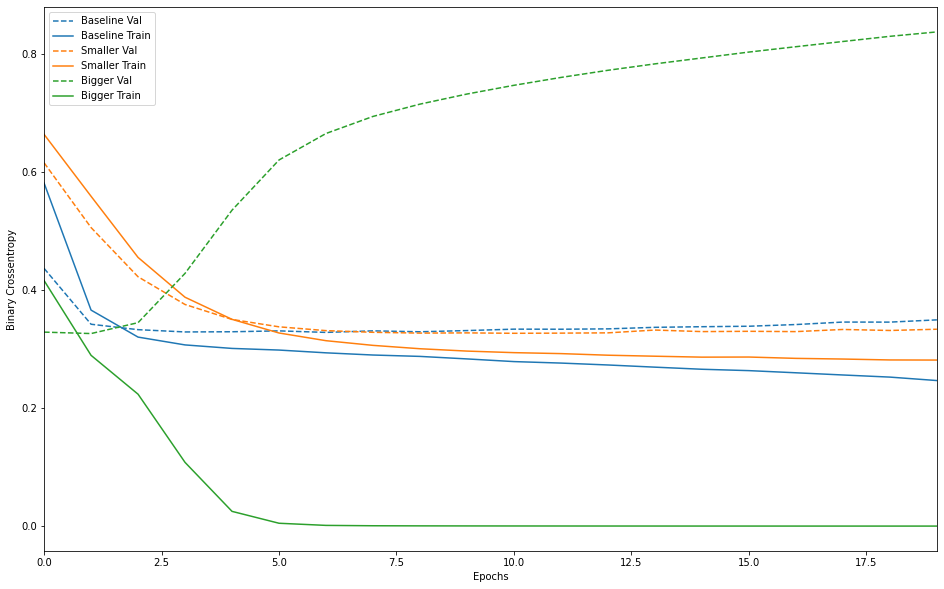

In [63]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [64]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels.reshape(-1, 1),
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels.reshape(-1, 1)),
                                verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.6233 - accuracy: 0.7080 - binary_crossentropy: 0.5784 - val_loss: 0.4782 - val_accuracy: 0.8175 - val_binary_crossentropy: 0.4347 - 2s/epoch - 35ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4145 - accuracy: 0.8482 - binary_crossentropy: 0.3716 - val_loss: 0.3876 - val_accuracy: 0.8544 - val_binary_crossentropy: 0.3456 - 475ms/epoch - 10ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3639 - accuracy: 0.8672 - binary_crossentropy: 0.3228 - val_loss: 0.3716 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3315 - 482ms/epoch - 10ms/step
Epoch 4/20
49/49 - 1s - loss: 0.3485 - accuracy: 0.8730 - binary_crossentropy: 0.3092 - val_loss: 0.3664 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3281 - 519ms/epoch - 11ms/step
Epoch 5/20
49/49 - 1s - loss: 0.3415 - accuracy: 0.8738 - binary_crossentropy: 0.3040 - val_loss: 0.3655 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3288 - 505ms/epoch - 10ms/step
Epoch 6/20
49/49 - 1s - loss: 0.3358 - accuracy: 0.8779 - binar

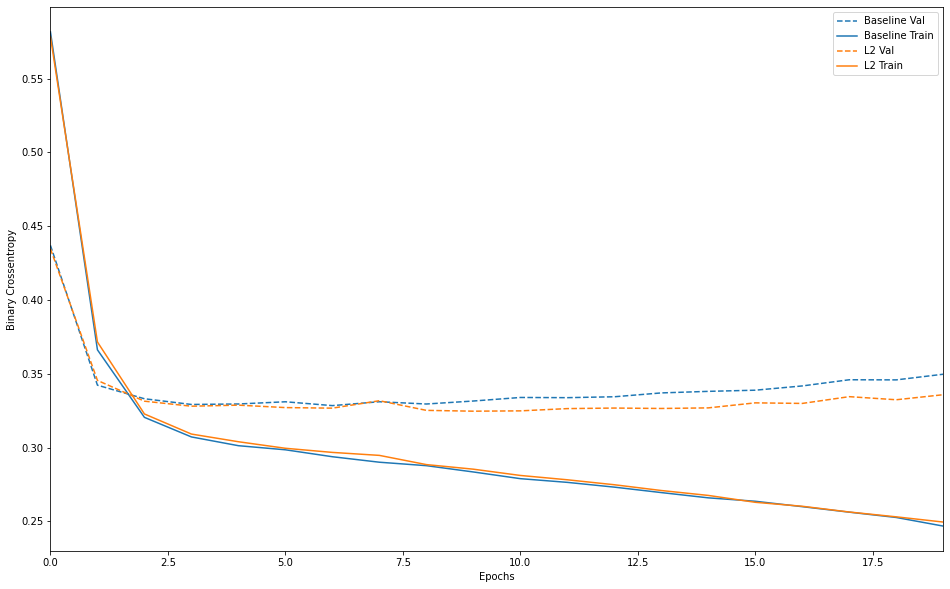

In [65]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [66]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels.reshape(-1, 1),
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels.reshape(-1, 1)),
                                verbose=2)

Epoch 1/20
49/49 - 4s - loss: 5.2843 - accuracy: 0.7776 - binary_crossentropy: 0.4770 - val_loss: 1.4238 - val_accuracy: 0.8497 - val_binary_crossentropy: 0.3565 - 4s/epoch - 86ms/step
Epoch 2/20
49/49 - 3s - loss: 0.7943 - accuracy: 0.8538 - binary_crossentropy: 0.3500 - val_loss: 0.5181 - val_accuracy: 0.8557 - val_binary_crossentropy: 0.3481 - 3s/epoch - 67ms/step
Epoch 3/20
49/49 - 3s - loss: 0.4713 - accuracy: 0.8552 - binary_crossentropy: 0.3453 - val_loss: 0.4404 - val_accuracy: 0.8578 - val_binary_crossentropy: 0.3418 - 3s/epoch - 64ms/step
Epoch 4/20
49/49 - 3s - loss: 0.4328 - accuracy: 0.8541 - binary_crossentropy: 0.3431 - val_loss: 0.4327 - val_accuracy: 0.8494 - val_binary_crossentropy: 0.3518 - 3s/epoch - 66ms/step
Epoch 5/20
49/49 - 3s - loss: 0.4215 - accuracy: 0.8538 - binary_crossentropy: 0.3435 - val_loss: 0.4117 - val_accuracy: 0.8595 - val_binary_crossentropy: 0.3382 - 3s/epoch - 68ms/step
Epoch 6/20
49/49 - 3s - loss: 0.3999 - accuracy: 0.8629 - binary_crossentro

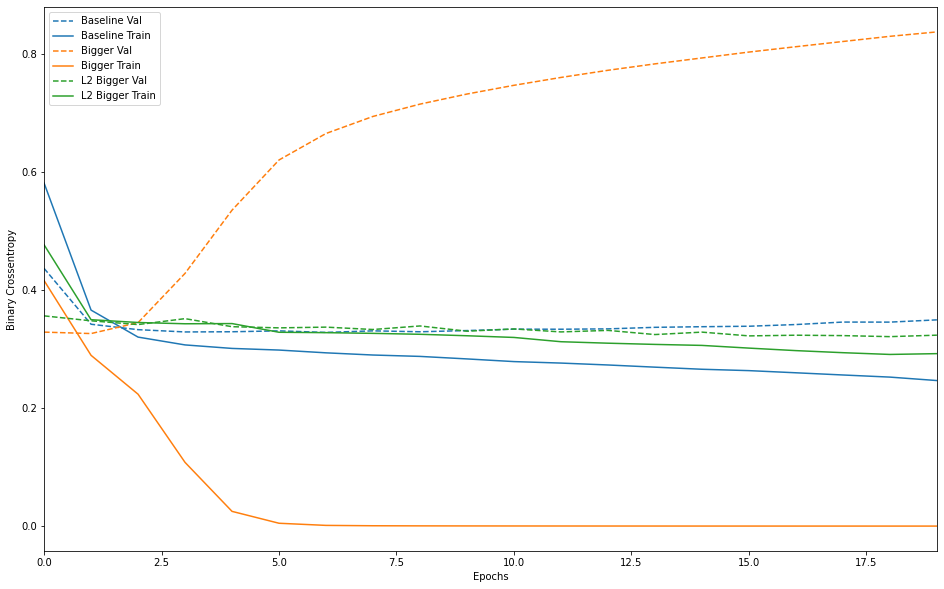

In [67]:
plot_history([('baseline', baseline_history),
              ('bigger', bigger_history),
              ('l2 bigger', l2_model_history)])

### batch normalization

In [68]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                50240     
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dense_40 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                     

### Activation Functions

In [70]:
tf.keras.layers.Softmax()
tf.keras.layers.ReLU()
tf.keras.layers.LeakyReLU()
tf.keras.layers.PReLU()

In [71]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [72]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                     

#### 비교

In [73]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [74]:
# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2901 - accuracy: 0.9162 - val_loss: 0.1516 - val_accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1305 - accuracy: 0.9615 - val_loss: 0.1155 - val_accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0967 - accuracy: 0.9711 - val_loss: 0.0973 - val_accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0763 - accuracy: 0.9770 - val_loss: 0.1019 - val_accuracy: 0.9687
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0647 - accuracy: 0.9795 - val_loss: 0.0903 - val_accuracy: 0.9709
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0943 - val_accuracy: 0.9710
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0903 - val_accuracy:

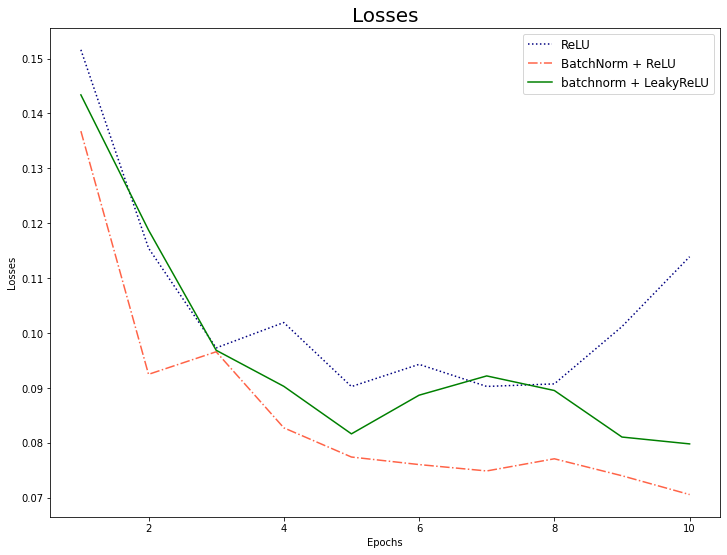

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()

### Early Stopping

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
# EarlyStopping 콜백 생성
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [78]:
hist = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=50, 
          callbacks=[earlystopping]
          )

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2276 - accuracy: 0.9329 - val_loss: 0.1239 - val_accuracy: 0.9611
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0937 - accuracy: 0.9711 - val_loss: 0.0875 - val_accuracy: 0.9731
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0655 - accuracy: 0.9795 - val_loss: 0.0825 - val_accuracy: 0.9749
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0686 - val_accuracy: 0.9789
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.0776 - val_accuracy: 0.9782
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0792 - val_accuracy: 0.9772
Epoch 7/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.1052 - val_accura

In [79]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [80]:
hist2 = model2.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=50
          )

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2234 - accuracy: 0.9333 - val_loss: 0.1185 - val_accuracy: 0.9637
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0946 - accuracy: 0.9707 - val_loss: 0.0966 - val_accuracy: 0.9699
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0639 - accuracy: 0.9800 - val_loss: 0.0759 - val_accuracy: 0.9765
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0500 - accuracy: 0.9841 - val_loss: 0.0908 - val_accuracy: 0.9747
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0845 - val_accuracy: 0.9762
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0850 - val_accuracy: 0.9776
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0809 - val_accur

#### 비교

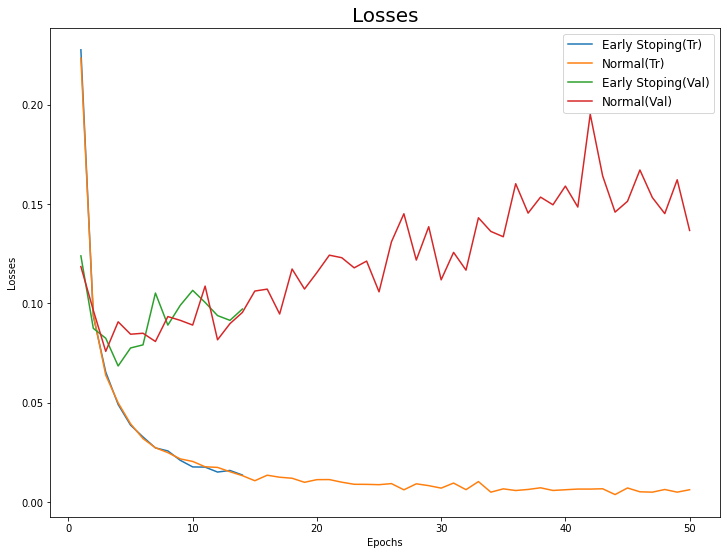

In [81]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, len(hist.history['accuracy'])+1), hist.history['loss'])
plt.plot(np.arange(1, len(hist2.history['accuracy'])+1), hist2.history['loss'])
plt.plot(np.arange(1, len(hist.history['accuracy'])+1), hist.history['val_loss'])
plt.plot(np.arange(1, len(hist2.history['accuracy'])+1), hist2.history['val_loss'])

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['Early Stoping(Tr)', 'Normal(Tr)', 'Early Stoping(Val)', 'Normal(Val)'], fontsize=12)
plt.show()

#### Optimizer

In [82]:
import tensorflow as tf

In [83]:
tf.keras.optimizers.SGD()
tf.keras.optimizers.Adagrad()
tf.keras.optimizers.RMSprop()
tf.keras.optimizers.Adam()

In [84]:
model.compile(tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Learning Rate Scheduler

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

In [86]:
# 수정 - tensorflow 2.18.0 버전에서는 학습률 스케줄러 적용시 numpy() 메서드 사용 필요

def scheduler(epoch, lr):
    # 현재 학습률을 출력하여 모니터링
    tf.print(f'learning_rate: {lr:.5f}')
    
    # 첫 5 에포크 동안은 초기 학습률 유지
    if epoch < 5:
        return lr
    else:
        # 5 에포크 이후부터는 지수적으로 학습률 감소
        # exp(-0.1)은 약 0.9의 값을 가져 매 에포크마다 학습률이 10% 감소
        # numpy()를 호출하여 텐서를 파이썬 스칼라 값으로 변환
        return lr * tf.math.exp(-0.1).numpy()

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [87]:
model.compile(tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 초기 학습률 확인(0.01)
print(round(model.optimizer.learning_rate.numpy(), 5))

0.01


In [88]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=10,
          # 학습률 스케줄러 적용
          callbacks=[lr_scheduler]
          )
# 최종 학습률 스케줄러 확인
round(model.optimizer.lr.numpy(), 5)

learning_rate: 0.01000
Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6354 - accuracy: 0.8212 - val_loss: 0.2893 - val_accuracy: 0.9168 - lr: 0.0100
learning_rate: 0.01000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2619 - accuracy: 0.9238 - val_loss: 0.2160 - val_accuracy: 0.9361 - lr: 0.0100
learning_rate: 0.01000
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2030 - accuracy: 0.9411 - val_loss: 0.1756 - val_accuracy: 0.9477 - lr: 0.0100
learning_rate: 0.01000
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1662 - accuracy: 0.9518 - val_loss: 0.1506 - val_accuracy: 0.9565 - lr: 0.0100
learning_rate: 0.01000
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1398 - accuracy: 0.9590 - val_loss: 0.1372 - val_accuracy: 0.9592 - lr: 0.0100
learning_rate: 0.01000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

0.00607

In [89]:
tf.keras.callbacks.ReduceLROnPlateau()

### Model Checkpoint

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드 10개로 생성
])

In [91]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [92]:
# 2025/05/05 수정 - tensorflow 2.18.0 버전에서는 모델 체크포인트 설정 방법이 변경됨

# 체크포인트 설정
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='tmp_checkpoint.ckpt.weights.h5', 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                monitor='val_loss', 
                                                verbose=1)

In [93]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=10, 
          callbacks=[checkpoint]
          )

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.2265 - accuracy: 0.9325
Epoch 1: val_loss improved from inf to 0.11132, saving model to tmp_checkpoint.ckpt
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2262 - accuracy: 0.9326 - val_loss: 0.1113 - val_accuracy: 0.9633
Epoch 2/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0947 - accuracy: 0.9714
Epoch 2: val_loss improved from 0.11132 to 0.08570, saving model to tmp_checkpoint.ckpt
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0947 - accuracy: 0.9714 - val_loss: 0.0857 - val_accuracy: 0.9735
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0669 - accuracy: 0.9800
Epoch 3: val_loss improved from 0.08570 to 0.07539, saving model to tmp_checkpoint.ckpt
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0671 - accuracy: 0.9799 - val_loss: 0.0754 - val_accuracy: 0.9770
Epoch 4/10
1869/1875 [======================

In [94]:
!ls

checkpoint  sample_data				     tmp_checkpoint.ckpt.index
model.png   tmp_checkpoint.ckpt.data-00000-of-00001


In [95]:
# 모델 체크포인트 로드 전
loss, acc = model.evaluate(x_test, y_test)
print(f'체크포인트 로드 전: loss: {loss:.4f}, acc: {acc:.4f}')


313/313 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9795
체크포인트 로드 전: loss: 0.0830, acc: 0.9795


In [96]:
# 수정 - tensorflow 2.18.0 버전에서는 모델 체크포인트 설정 방법이 변경됨

# 체크포인트 파일을 모델에 로드
model.load_weights('tmp_checkpoint.ckpt.weights.h5')
loss, acc = model.evaluate(x_test, y_test)
print(f'체크포인트 로드 후: loss: {loss:.4f}, acc: {acc:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9809
체크포인트 로드 후: loss: 0.0679, acc: 0.9809


### Model Save & Load

In [97]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), # 노드는 10개가 되어야 한다.
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,
            validation_data=(x_test, y_test), 
            epochs=10, 
            )

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2239 - accuracy: 0.9331 - val_loss: 0.1498 - val_accuracy: 0.9523
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0943 - accuracy: 0.9707 - val_loss: 0.1031 - val_accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0649 - accuracy: 0.9800 - val_loss: 0.0965 - val_accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.0942 - val_accuracy: 0.9723
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0992 - val_accuracy: 0.9728
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.0761 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.1172 - val_accur

In [98]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_63 (Dense)            (None, 256)               200960    
                                                                 
 dense_64 (Dense)            (None, 64)                16448     
                                                                 
 dense_65 (Dense)            (None, 32)                2080      
                                                                 
 dense_66 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [99]:
# 모델 검증
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.08015, acc: 0.98050


#### h5 format 저장

In [100]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

In [101]:
!ls

checkpoint   model.png	  tmp_checkpoint.ckpt.data-00000-of-00001
h5-model.h5  sample_data  tmp_checkpoint.ckpt.index


In [102]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_63 (Dense)            (None, 256)               200960    
                                                                 
 dense_64 (Dense)            (None, 64)                16448     
                                                                 
 dense_65 (Dense)            (None, 32)                2080      
                                                                 
 dense_66 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.08015, acc: 0.98050


#### SavedModel format 저장

- 2025/05/05 수정 내용
- Tensorflow > 2.18 버전에서는 새로운 model 저장 format 지원
- .keras 사용
- TensorFlow 2.18/Keras 3에서는 .keras 확장자가 새로운 권장 저장 형식으로, 이름 기반 저장 방식을 통해 정확성과 디버깅 용이성을 제공합니다. 파일 확장자 없이 저장하면 오류가 발생합니다.

In [104]:
# 2025/05/05 수정 내용
# TensorFlow 2.18/Keras 3에서는 .keras 확장자가 새로운 권장 저장 형식으로, 이름 기반 저장 방식을 통해 정확성과 디버깅 용이성을 제공합니다. 파일 확장자 없이 저장하면 오류가 발생합니다. 

# 모델을 SavedModel 포맷으로 저장
model.save('saved-model.keras ')

INFO:tensorflow:Assets written to: saved-model/assets


In [105]:
!ls

checkpoint   sample_data			      tmp_checkpoint.ckpt.index
h5-model.h5  saved-model
model.png    tmp_checkpoint.ckpt.data-00000-of-00001


In [106]:
!ls ./saved-model.keras 

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
# 2025/05/05 수정 내용
# TensorFlow 2.18/Keras 3에서는 .keras 확장자가 새로운 권장 저장 형식으로, 이름 기반 저장 방식을 통해 정확성과 디버깅 용이성을 제공합니다. 파일 확장자 없이 저장하면 오류가 발생합니다.
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model.keras ')
saved_model.summary()

: 

In [108]:
# 모델 검증 (HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'[h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'[saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

[h5 model] loss: 0.08015, acc: 0.98050
[saved_model] loss: 0.08015, acc: 0.98050
